In [1]:
import pandas as pd

series = pd.read_csv(
    "aljmas - Copy.csv",
    index_col=0,
    parse_dates=True,
).squeeze()


In [2]:
series

Year
1950-01-01    3.310481
1951-01-01    3.392697
1952-01-01    3.404149
1953-01-01    3.328787
1954-01-01    3.413635
                ...   
2017-01-01    3.415140
2018-01-01    3.402605
2019-01-01    3.438067
2020-01-01    3.429591
2021-01-01    3.421110
Name: Flow, Length: 72, dtype: float64

In [3]:
series = (
    series
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
# series = series - (series.index.array - pd.to_datetime("1992")
#                    ) / pd.to_timedelta("365.2425D") * 2.87e-3

In [4]:
print(type(series))

<class 'pandas.core.series.Series'>


In [5]:
from pyextremes import EVA

model = EVA(series)

In [6]:
model.get_extremes(method="BM", block_size="365.0D")


(<Figure size 768x480 with 1 Axes>, <AxesSubplot:xlabel='Year', ylabel='Flow'>)

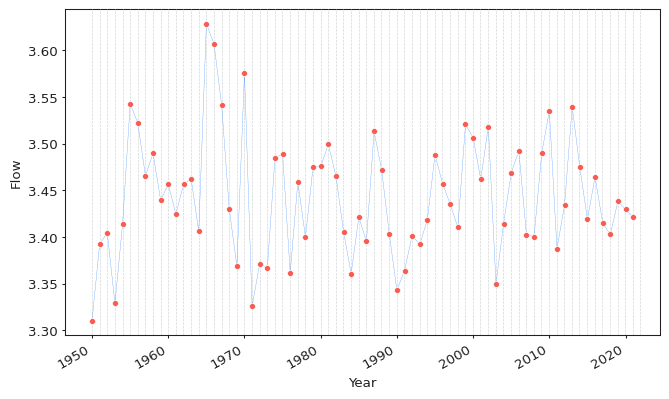

In [7]:
model.plot_extremes()

In [8]:
model.fit_model(distribution='pearson3')


c:\Users\sandros\AppData\Local\Programs\Python\Python38\lib\site-packages\pyextremes\eva.py:1012: RuntimeWarning: 'pearson3' distribution is not recommended to be used with extremes extracted using the 'BM' method, 'genextreme' or 'gumebel_r' should be used per the Fisher-Tippet-Gnedenko theorem
  warnings.warn(


In [9]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          Flow      Size:                                  72
Start:                       January 1950      End:                         January 2021
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 72      Extraction method:                     BM
Type:                                high      Block size:             365 days 00:00:00
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [13]:
summary = model.get_summary(
    return_period=[1/0.999, 1/0.995, 1/0.99, 1/0.98, 1/0.96, 1/0.95, 1/0.9, 1/0.8, 2, 5, 10, 20, 50, 100, 1000],
    alpha=0.5,
    n_samples=1000,
)


In [14]:
print(summary)


               return value  lower ci  upper ci
return period                                  
1.001001           3.291589  3.284320  3.311856
1.005025           3.307221  3.301468  3.322788
1.010101           3.316747  3.311757  3.330137
1.020408           3.328126  3.323450  3.339692
1.041667           3.341756  3.337116  3.351112
1.052632           3.346738  3.342111  3.355627
1.111111           3.364672  3.360043  3.372123
1.250000           3.388090  3.383590  3.394593
2.000000           3.438134  3.432580  3.442976
5.000000           3.495301  3.487046  3.500554
10.000000          3.528124  3.518139  3.535376
20.000000          3.556793  3.544575  3.566410
50.000000          3.590782  3.575522  3.604200
100.000000         3.614469  3.596630  3.631166
1000.000000        3.685312  3.658565  3.712150


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Flow'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Flow', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

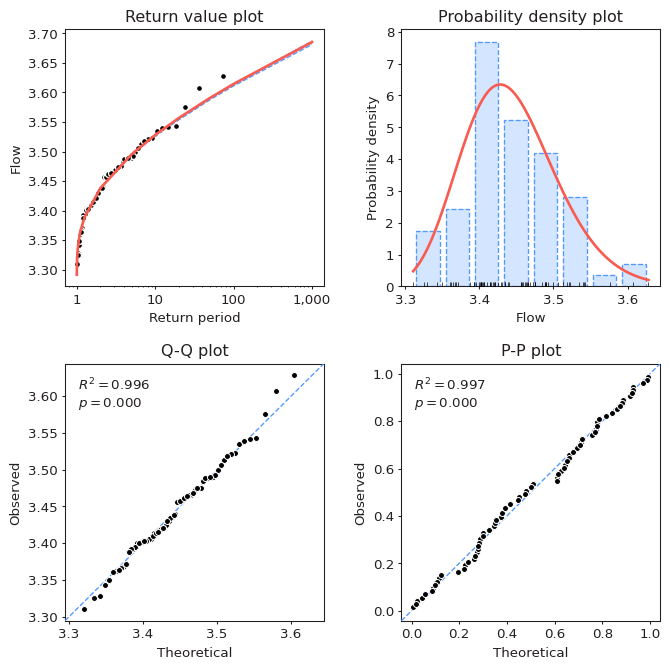

In [17]:
model.plot_diagnostic(return_period=[
                      1/0.999, 1/0.995, 1/0.99, 1/0.98, 1/0.96, 1/0.95, 1/0.9, 1/0.8, 2, 5, 10, 20, 50, 100, 1000],
                      plotting_position='weibull',
                      alpha=0.05
                      )


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Return period', ylabel='Flow'>)

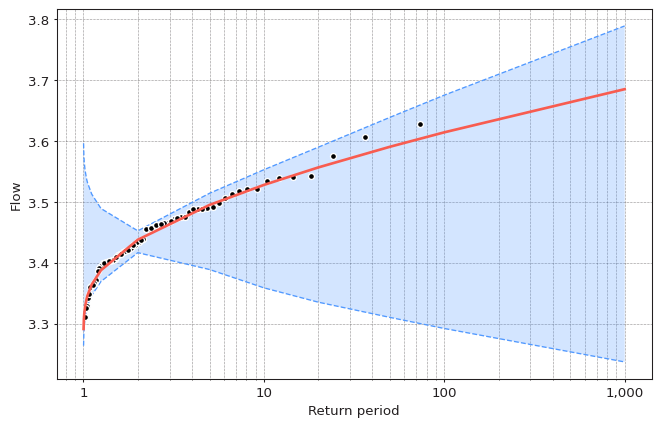

In [18]:
model.plot_return_values(return_period=[
    1/0.999, 1/0.995, 1/0.99, 1/0.98, 1/0.96, 1/0.95, 1/0.9, 1/0.8, 2, 5, 10, 20, 50, 100, 1000],
    alpha=0.95)
